In [11]:
import cv2 
import os
import time 
import tensorflow as tf
import numpy as np

from tensorflow.python.keras.utils.data_utils import get_file

base_dir = 'WeaponDetection'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#Directory with training healthy pictures
train_healthy_dir = os.path.join(train_dir, 'threat')

#Directory with training unhealthy pictures
train_unhealthy_dir = os.path.join(train_dir, 'nothreat')

#Directory with validation healthy pictures
validation_healthy_dir = os.path.join(validation_dir, 'threat')

#Directory with validation unhealthy pictures
validation_unhealthy_dir = os.path.join(validation_dir, 'nothreat')

In [12]:
train_healthy_fnames = os.listdir(train_healthy_dir)
train_unhealthy_fnames = os.listdir(train_unhealthy_dir)

print(train_healthy_fnames[:10])
print(train_unhealthy_fnames[:10])

['-1.jpg', '-10.jpg', '-11.jpg', '-12.jpg', '-13.jpg', '-2.jpg', '-3.jpg', '-4.jpg', '-5.jpg', '-6.jpg']
['bottle (1).jpg', 'bottle (2).jpg', 'bottle (3).jpg', 'bottle (4).jpg', 'bottle (5).jpg', 'bottle (6).jpg', 'bottle (7).jpg', 'buddha (10).jpg', 'buddha (11).jpg', 'buddha (12).jpg']


In [13]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

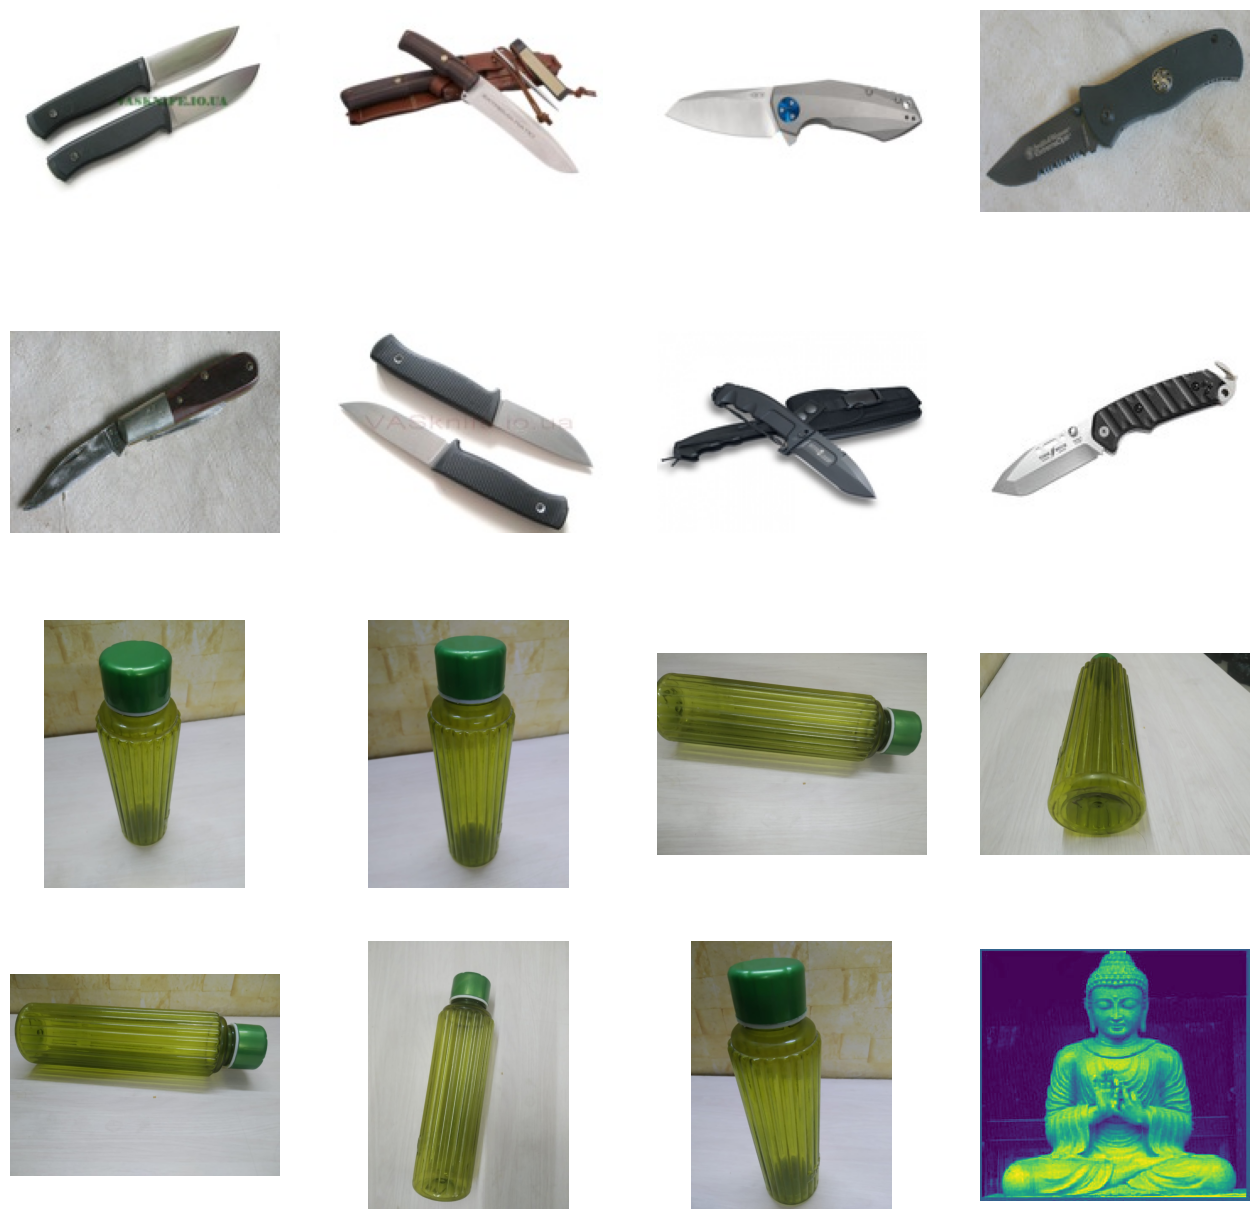

In [14]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_healthy_pix = [os.path.join(train_healthy_dir, fname)
                   for fname in train_healthy_fnames[pic_index-8:pic_index]
                   ]

next_unhealthy_pix = [os.path.join(train_unhealthy_dir, fname)
                   for fname in train_unhealthy_fnames[pic_index-8:pic_index]
                   ]

for i, img_path in enumerate(next_healthy_pix+next_unhealthy_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150,150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

Found 450 images belonging to 2 classes.
Found 210 images belonging to 2 classes.


In [16]:
from tensorflow.keras.optimizers import RMSprop

def create_model() :
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('healthy') and 1 
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                    optimizer=RMSprop(learning_rate=1e-4),
                    metrics=['accuracy'])
    
    return model

## model.summary()

In [21]:
# Constant for epochs
EPOCHS = 75

model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=20,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=2)

model.save('my_model.h5')

Epoch 1/75
20/20 - 10s - 487ms/step - accuracy: 0.5400 - loss: 0.6908 - val_accuracy: 0.5750 - val_loss: 0.6872
Epoch 2/75
20/20 - 0s - 15ms/step - accuracy: 0.6000 - loss: 0.5122 - val_accuracy: 0.5000 - val_loss: 0.3433
Epoch 3/75
20/20 - 6s - 287ms/step - accuracy: 0.6359 - loss: 0.6781 - val_accuracy: 0.5250 - val_loss: 0.6861
Epoch 4/75
20/20 - 0s - 16ms/step - accuracy: 0.5333 - loss: 0.5205 - val_accuracy: 0.5000 - val_loss: 0.3461
Epoch 5/75
20/20 - 6s - 298ms/step - accuracy: 0.6575 - loss: 0.6634 - val_accuracy: 0.6600 - val_loss: 0.6593
Epoch 6/75
20/20 - 0s - 13ms/step - accuracy: 0.7000 - loss: 0.4829 - val_accuracy: 0.7000 - val_loss: 0.3192
Epoch 7/75
20/20 - 6s - 293ms/step - accuracy: 0.6667 - loss: 0.6421 - val_accuracy: 0.6650 - val_loss: 0.6363
Epoch 8/75
20/20 - 0s - 15ms/step - accuracy: 0.6833 - loss: 0.4793 - val_accuracy: 0.7000 - val_loss: 0.3317
Epoch 9/75
20/20 - 6s - 296ms/step - accuracy: 0.6821 - loss: 0.6144 - val_accuracy: 0.5900 - val_loss: 0.6464
Epoc

Epoch 75/75
20/20 - 6s - 312ms/step - accuracy: 0.8667 - loss: 0.3053 - val_accuracy: 0.8400 - val_loss: 0.3527


In [22]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

plt.show()

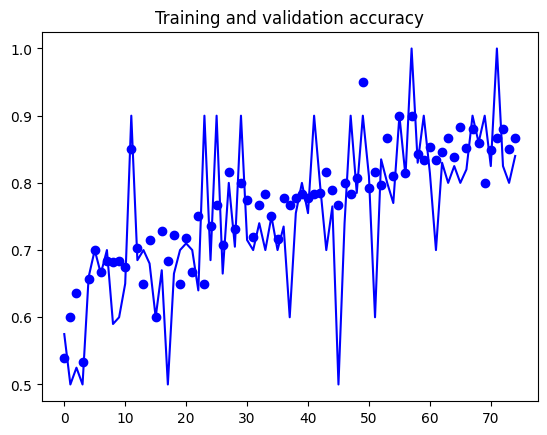

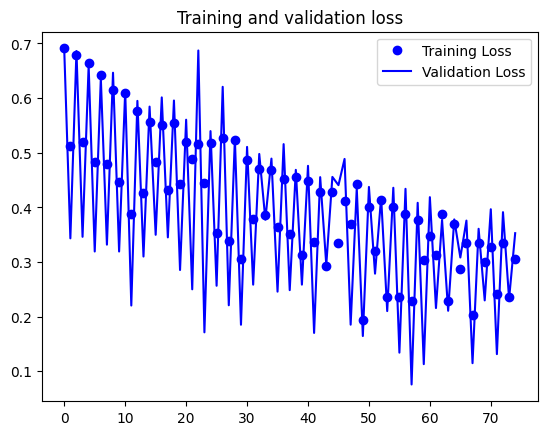

In [23]:
plot_loss_acc(history)

In [24]:
labels = ['test']
number_imgs = 10

In [25]:
IMAGES_PATH = 'C:\\Users\\Shashwat\\Downloads'
if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':
         !mkdir {IMAGES_PATH}
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

In [26]:
# Import uuid
import uuid

# Import Operating System
import os

# Import time
import time

In [37]:
for label in labels:
    cap = cv2.VideoCapture(0)
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    for imgnum in range(number_imgs):
        print('Collecting image {}'.format(imgnum))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,label,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        cv2.imwrite(imgname, frame)
        cv2.imshow('frame', frame)
        time.sleep(2)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
This image is 0.00% a threat and 100.00% no threat.


C:\Users\Shashwat\AppData\Local\Temp\ipykernel_2220\3623016935.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(predictions[0])


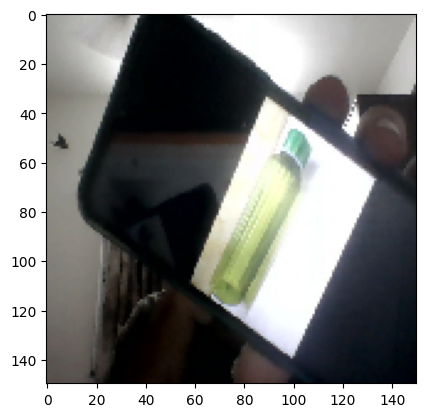

In [39]:
from tensorflow import keras
img = keras.utils.load_img( 
    "C:\\Users\\Shashwat\\Downloads\\test\\image (3).jpg", target_size=(150,150)
)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% a threat and {100 * score:.2f}% no threat.")